# Implementación del descenso de gradiente
Se implementará el algoritmo de optimización **descenso de gradiente** para calcular los parámetros de regresión sobre un conjunto de datos pequeño, con una variable independiente, para una visualización y entendimiento óptimos.

## Librerías básicas

In [198]:
# Librerias básicas
import numpy as np
import matplotlib.pyplot as plt

## Recolección de datos
Los datos han sido generados de manera que exista una relación lineal entre $x$ y la variable dependiente $y$, lo que facilitará la construcción de un modelo lineal entre ambas.


In [199]:
# Generamos 100 valores de x entre 0 y 10
np.random.seed(42)
x = np.linspace(0, 10, 100)

# y = 3*x + 7 + algo de ruido para que no sea perfecto
y = 3 * x + 7 + np.random.normal(0, 1, 100)

x, y


(array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677,  6.8

## Visualización de datos
Usando Matplotlib, visualizamos los datos en el plano.

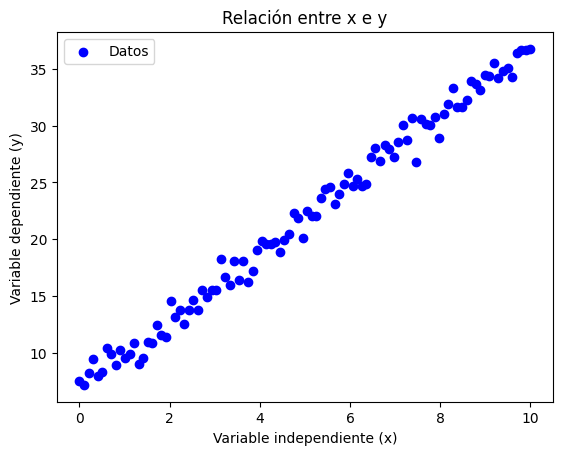

In [200]:
plt.scatter(x, y, color='blue', label='Datos')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Variable dependiente (y)')
plt.title('Relación entre x e y')
plt.legend()
plt.show()

## Datos iniciales necesarios

Se tiene la matriz $X$ con el bias agregado:
$$
X=\begin{pmatrix}
    1 & x^{(1)}\\
    1 & x^{(2)}\\
    \vdots & \vdots\\
    1 & x^{(n)}
    \end{pmatrix}
$$
Donde $n$ es el número de datos y $d=1$ es el número de variables independientes.


In [201]:
X = np.column_stack((np.ones_like(x), x))  # matriz X con columna de unos
n, d = X.shape  # n = número de datos, d = número de características (2 en este caso)

## Función de costo
Función que calcula el costo entre predicciónes y valores reales
$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2
$$

In [202]:
def compute_cost(X, y, theta):
    y_pred = X @ theta
    return ((y_pred - y) ** 2).mean() / 2

## Descenso de gradiente
Implementación del algoritmo de descenso de gradiente mediante la fórmula
$$
\theta =\theta - \alpha \nabla_\theta J(\theta)
$$
Con
$$
\nabla_\theta J(\theta) = \frac{1}{n}X^T(\hat{y}-y)
$$
Vamos a detener la ejecución del bucle hasta que ocurra que:
$$
\| \theta^{(t)}-\theta^{(t+1)} \| < \epsilon
$$

In [203]:
def gradient_descent(X, y, alpha=0.01, max_iter=1000, tol=1e-6):
    theta = np.random.rand(X.shape[1])
    cost_history = []

    for i in range(max_iter):
        y_pred = X @ theta
        error = y_pred - y
        grad = X.T @ error / n
        theta_prev = theta.copy()
        theta = theta - alpha * grad

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # criterio de parada
        if np.linalg.norm(theta - theta_prev) < tol:
            print(f'Convergencia en iteración {i+1}')
            break
    return theta, cost_history


## Ejecución del descenso de gradiente

In [204]:
alpha = 0.01
max_iter = 1000
tol = 1e-6

theta_opt, cost_hist = gradient_descent(X, y, alpha, max_iter, tol)
print(f'Parámetros optimizados: {theta_opt}')

Parámetros optimizados: [6.33913749 3.0871765 ]


## Visualización de la convergencia del costo

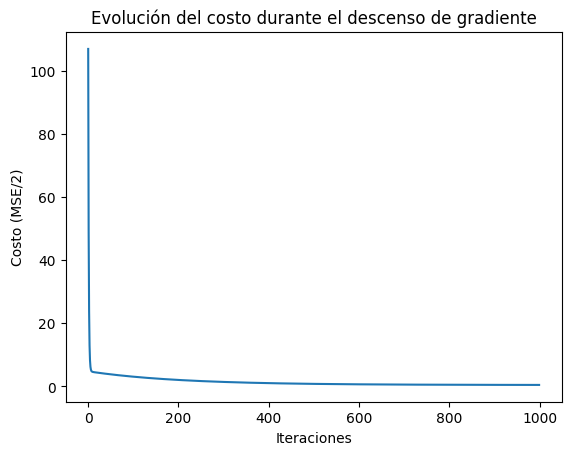

In [205]:
plt.plot(cost_hist)
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE/2)')
plt.title('Evolución del costo durante el descenso de gradiente')
plt.show()

## Visualización final con predicción

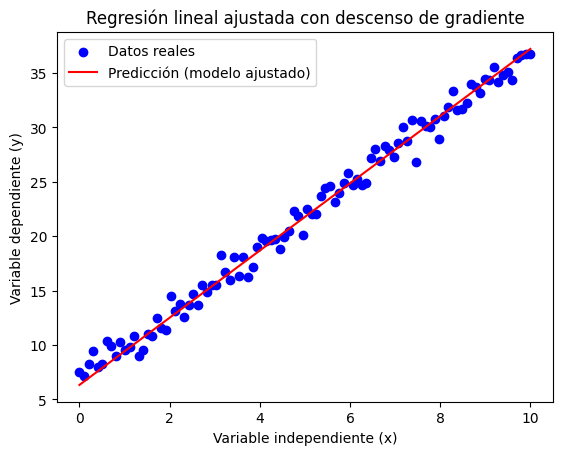

In [206]:
# Predicción final
y_pred_final = X @ theta_opt

# Gráfica
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred_final, color='red', label='Predicción (modelo ajustado)')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Variable dependiente (y)')
plt.title('Regresión lineal ajustada con descenso de gradiente')
plt.legend()
plt.show()

## Coeficiente Determinación $R^2$
Una medida para evaluar que tan efectivo fue el algortimo en las predicciones es el mismo **Coeficiente Determinación** o $R^2$, el cual está dado por la fórmula:
$$
R^2= 1-\frac{\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2}  
$$

In [207]:
R2 = 1 - np.sum((y - y_pred_final)**2) / np.sum((y - np.mean(y))**2)
print("R² (manual) =", R2)

R² (manual) = 0.988782502493475


Mientras que con $R^2$ de `sklearn` se obtiene:



In [208]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred_final)
print("R² (sklearn) =", r2)


R² (sklearn) = 0.988782502493475
